In [2]:
# pandas, Numpy
import pandas as pd
import numpy as np

# Import visualization packages "Matplotlib" and "Seaborn". 
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

import itertools

from ipywidgets import interact, widgets

import scipy

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score,mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import balanced_accuracy_score

In [3]:
#Read dataset and make a copy of the original
df_white=pd.read_csv("Resources/winequality-white.csv",delimiter=';') 

df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
# Data types and other information
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
def quality(rating):
    if rating >= 7:
        return 'promising'
    elif rating <=5:
        return 'cooking wine'
    else:
        return 'trivial wine'

In [6]:
df_white['rating'] = (df_white['quality']).apply(quality)

In [7]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,trivial wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,trivial wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,trivial wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,trivial wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,trivial wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,trivial wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,cooking wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,trivial wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,promising


In [8]:
# checking missing values
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64

In [9]:
# checking duplicates
df_white.duplicated().sum()

937

In [10]:
# Keep only the first occurrence of each duplicate
df_white.drop_duplicates(keep='first', inplace=True)

In [11]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,trivial wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,trivial wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,trivial wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,trivial wine
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,trivial wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,trivial wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,cooking wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,trivial wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,promising


In [12]:
df_white.duplicated().sum()

0

In [13]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


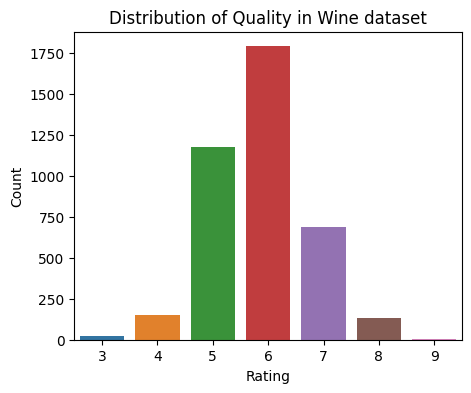

In [14]:
#Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='quality', data=df_white)
plt.title('Distribution of Quality in Wine dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

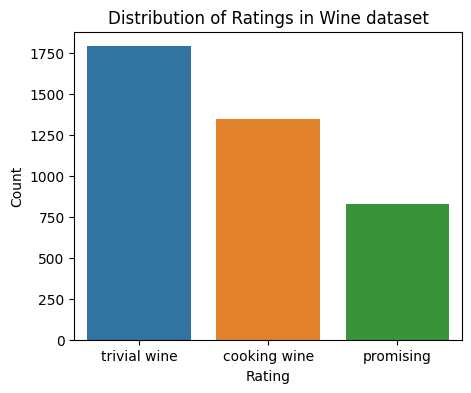

In [15]:
#Distribution of the target variable
plt.figure(figsize=(5, 4))
sns.countplot(x='rating', data=df_white)
plt.title('Distribution of Ratings in Wine dataset')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
# Get the counts and percentages
value_counts = df_white['rating'].value_counts()
percentage_counts = df_white['rating'].value_counts(normalize=True) * 100  

# Create a DataFrame to combine counts and percentages
summary_df = pd.DataFrame({
    'Count': value_counts,
    'Percentage': percentage_counts
})

# Format the Percentage to 1 decimal place
summary_df['Percentage'] = summary_df['Percentage'].round(1)

# Display the summary DataFrame
print(summary_df)


              Count  Percentage
rating                         
trivial wine   1788        45.1
cooking wine   1348        34.0
promising       825        20.8


### Numerical variables

In [17]:
palette = sns.color_palette('Blues', 8)
wine=df_white.copy()
wine.drop(['rating'], axis=1, inplace=True)#it is not a numerical.
numerical = wine.select_dtypes(include = 'number').columns


numerical

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
def plot_distribution(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))
    fig.suptitle("Distribution of Continuous Variables", fontsize=16, fontweight='bold')

    # Histogram
    counts, bins, patches = ax1.hist(df_white[column].dropna(), bins=20, edgecolor='black')
    ax1.set_xlabel(column, fontsize=14)
    ax1.set_ylabel("Counts", fontsize=14)

    # Adding data labels to histogram bars
    for count, patch in zip(counts, patches):
        height = patch.get_height()
        ax1.annotate(f'{int(count)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                     xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

    # Boxplot
    ax2.boxplot(df_white[column].dropna(), vert=False)
    ax2.set_xlabel(column, fontsize=14)
    ax2.set_ylabel("", fontsize=14)

    # Adding median and quartile values to the box plot
    median = np.median(df_white[column].dropna())
    q1 = np.percentile(df_white[column].dropna(), 25)
    q3 = np.percentile(df_white[column].dropna(), 75)

    ax2.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(0, -28), 
                 textcoords='offset points', ha='center', va='center', color='red', fontsize=12)
    ax2.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='blue', fontsize=12)
    ax2.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(0, 27), 
                 textcoords='offset points', ha='center', va='center', color='green', fontsize=12)

    #plt.savefig(f'img/{column}.png')
    plt.tight_layout()
    plt.show()

# Create an interactive widget
interact(plot_distribution, column=widgets.Dropdown(options=numerical, description='Numeric:'))

interactive(children=(Dropdown(description='Numeric:', options=('fixed acidity', 'volatile acidity', 'citric a…

<function __main__.plot_distribution(column)>

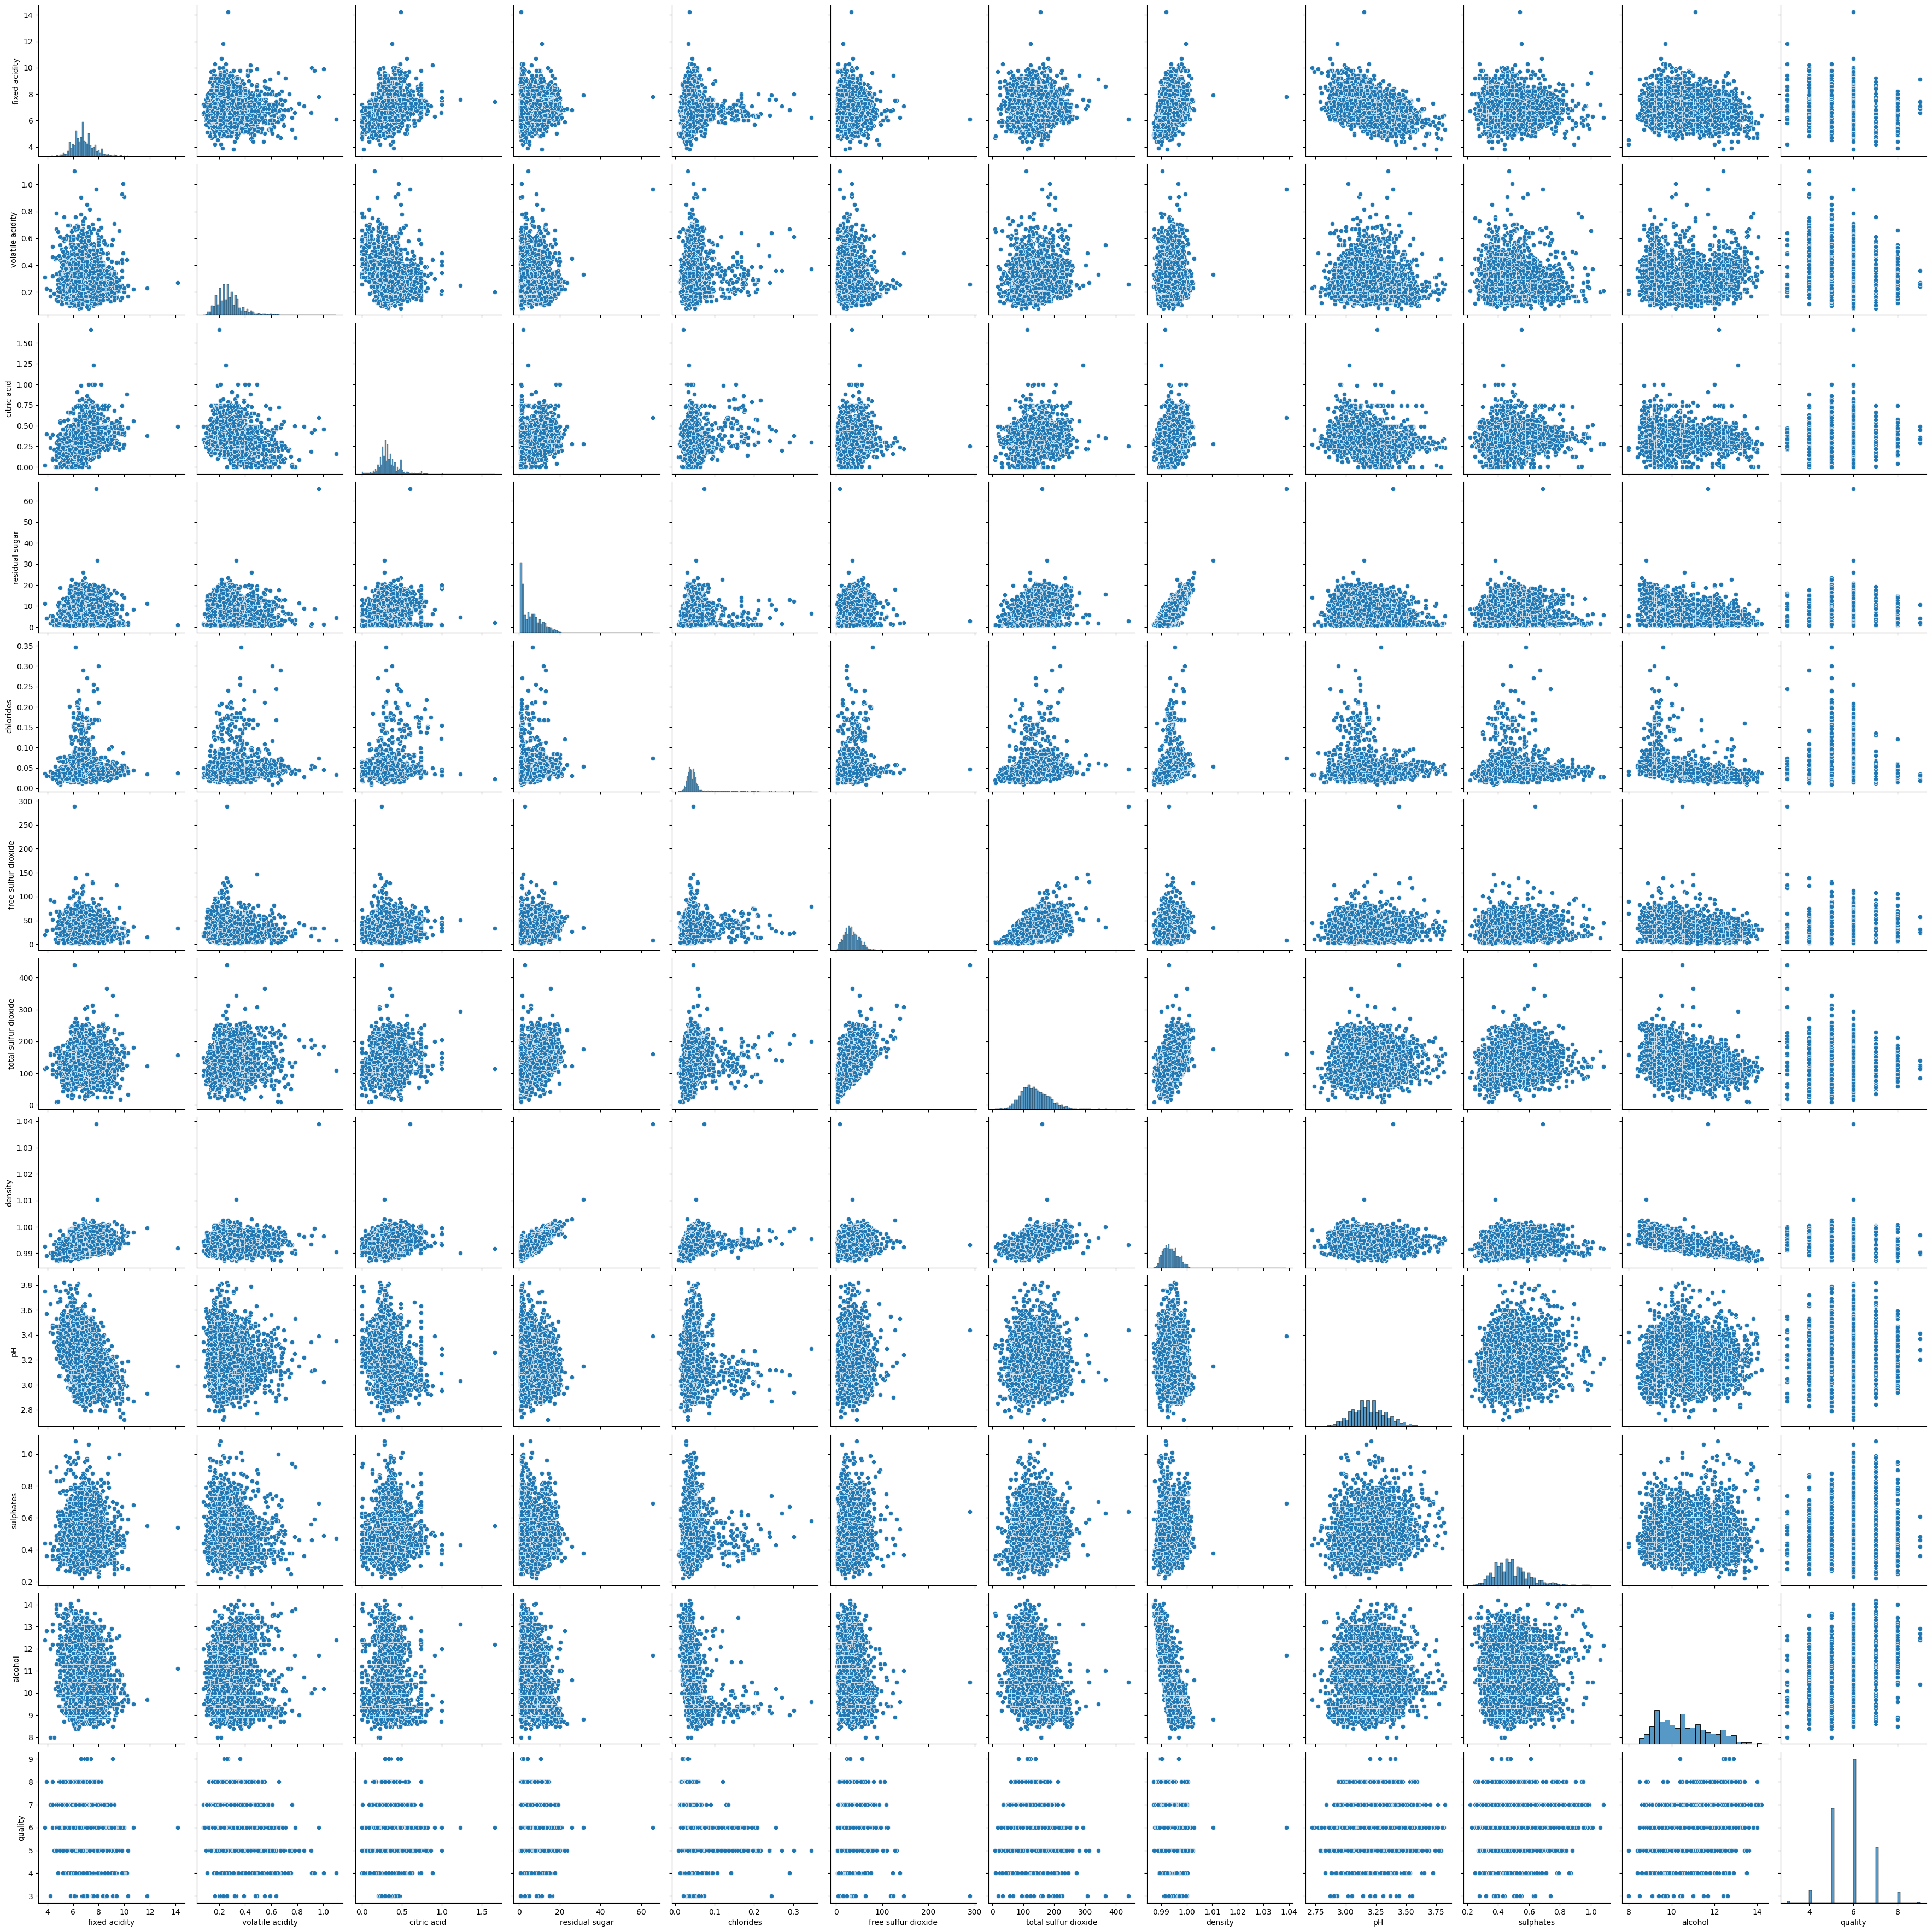

In [19]:
sns.pairplot(df_white, height=3.0)

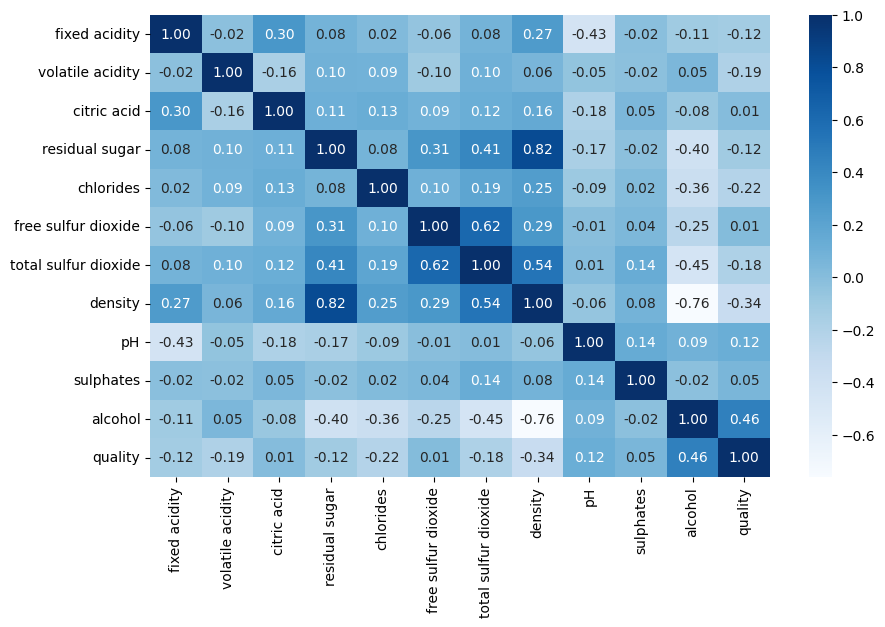

In [20]:

df=df_white.copy()
df.drop(['rating'], axis=1, inplace=True)
# Set the figure size 
plt.figure(figsize=(10, 6))

# Correlation matrix / heatmap
sns.heatmap(df.corr(),cmap='Blues', annot=True,fmt=".2f")
# Display the heatmap
plt.show()

In [21]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


In [22]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,trivial wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,trivial wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,trivial wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,trivial wine
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,trivial wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,trivial wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,cooking wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,trivial wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,promising


In [23]:
#Divide dataset into features and targets and assign the features to a
#variable named 'X' and the target to a variable named 'y'
X = df_white.drop(columns=['quality','rating'])
y = df_white['rating']

In [24]:
# Encode the target labels to convert the categorical Genre 
#values into numerical form
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [25]:
y_encoded

array([2, 2, 2, ..., 2, 1, 2])

## PCA

In [26]:
#Use the StandardScaler() from sklearn to standardize data. 
# Then, apply the fit_transform() method 
#and store the standardized features in a variable called X_scaled.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
#Fit the transformed X_scaled data into the PCA() model
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 3.86270167, -0.51113814,  0.90620427, ...,  0.07747552,
        -0.06865205,  0.02155193],
       [-0.51167308,  0.43649609,  0.34587908, ..., -1.01688032,
        -0.29811512,  0.12841862],
       [ 0.28447384, -1.17148908,  0.11582082, ...,  0.53058622,
         0.84721663, -0.19845538],
       ...,
       [-0.7041143 , -0.36294358,  0.55768924, ..., -1.14914491,
         0.15278093,  0.10747228],
       [-3.27564633,  0.93259876,  0.14688012, ..., -0.13743701,
        -0.62675656,  0.02204931],
       [-2.71929413, -0.10787142, -0.37117275, ..., -0.57301744,
        -0.31643   , -0.0416911 ]])

In [28]:
#Calculate the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

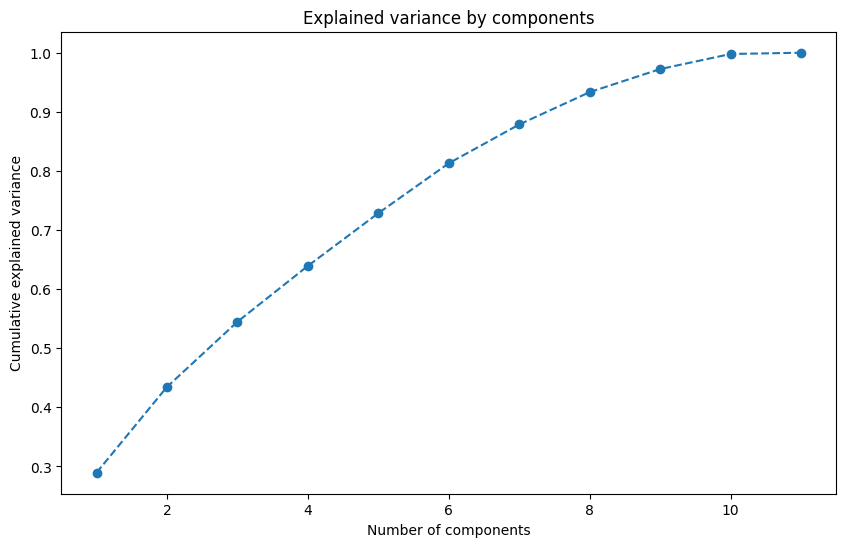

In [29]:
#Visualize the explained variance against the number of principal components 
plt.figure(figsize=(10,6))
plt.plot(range(1,12),explained_variance.cumsum(),marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [30]:
# Perform PCA again by defining n_components = 9 
#and transform  scaled data with this PCA model.
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[ 3.86270167, -0.51113814,  0.90620427, ..., -1.2035052 ,
         0.13481309, -1.20795557],
       [-0.51167308,  0.43649609,  0.34587908, ..., -0.76493102,
         0.26345159,  0.59488027],
       [ 0.28447384, -1.17148908,  0.11582082, ..., -0.7943195 ,
         0.44330553,  0.87571133],
       ...,
       [-0.7041143 , -0.36294358,  0.55768924, ..., -0.25346199,
        -1.74898675, -0.36902919],
       [-3.27564633,  0.93259876,  0.14688012, ...,  0.31483415,
         1.00038299, -0.06298973],
       [-2.71929413, -0.10787142, -0.37117275, ..., -0.15396066,
         0.87153596,  0.11936549]])

In [31]:
#Split the transformed data and the encoded target variable into 
#training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=1)


# testing models

In [32]:
#Applying Logistic Regression on PCA trnasformed data
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [33]:
#Accuracy score and classification report-PCA transformed dataset
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5573770491803278

Classification Report:
               precision    recall  f1-score   support

cooking wine       0.64      0.54      0.58       263
   promising       0.48      0.42      0.45       159
trivial wine       0.54      0.63      0.58       371

    accuracy                           0.56       793
   macro avg       0.55      0.53      0.54       793
weighted avg       0.56      0.56      0.56       793



In [34]:
# Carry out same process with the Original dataset
#split data set
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=1)

In [35]:


logreg_orig = LogisticRegression(max_iter=10000)
logreg_orig.fit(X_train_orig, y_train_orig)

LogisticRegression(max_iter=10000)

In [36]:
#Accuracy score and classification report -Original dataset
y_pred_orig = logreg_orig.predict(X_test_orig)
print("Accuracy with Original Features:", accuracy_score(y_test_orig, y_pred_orig))
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_pred_orig, target_names=le.classes_))

Accuracy with Original Features: 0.5863808322824716

Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.66      0.65      0.65       263
   promising       0.50      0.41      0.45       159
trivial wine       0.57      0.62      0.59       371

    accuracy                           0.59       793
   macro avg       0.58      0.56      0.57       793
weighted avg       0.58      0.59      0.58       793



In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_orig, y_train_orig)

RandomForestClassifier(n_estimators=500)

In [38]:
y_test_pred = model.predict(X_test_orig)
print(balanced_accuracy_score(y_test_orig, y_test_pred))

0.611923608193068


In [39]:
importances = model.feature_importances_
feature_names = X.columns  
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

  
print(importances_df)

                 Feature  Importance
10               alcohol    0.127134
7                density    0.105664
1       volatile acidity    0.096751
5    free sulfur dioxide    0.096551
6   total sulfur dioxide    0.089271
4              chlorides    0.086155
3         residual sugar    0.084914
8                     pH    0.084192
2            citric acid    0.078876
9              sulphates    0.077009
0          fixed acidity    0.073481


In [40]:
models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train_orig, y_train_orig)
    y_test_pred = model.predict(X_test_orig)
    y_train_pred = model.predict(X_train_orig)

    models['train_score'].append(balanced_accuracy_score(y_train_orig, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_orig, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

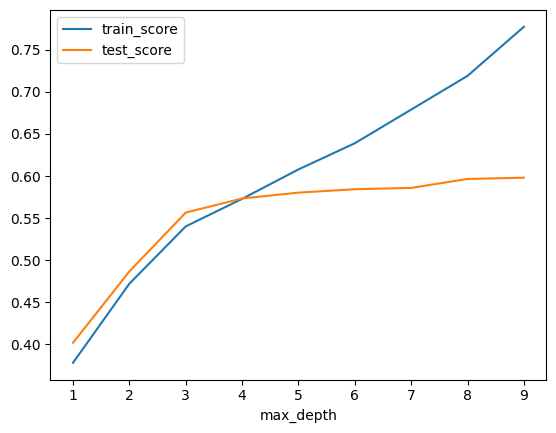

In [41]:
models_df.plot(x='max_depth')

In [42]:
model = RandomForestClassifier(n_estimators=500, max_depth=5)
model.fit(X_train_orig, y_train_orig)
y_test_pred = model.predict(X_test_orig)
y_train_pred=model.predict(X_train_orig)
print(balanced_accuracy_score(y_test_orig, y_test_pred))
print(balanced_accuracy_score(y_train_orig, y_train_pred))

0.5786106584585672
0.6038436457199405


In [43]:
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, y_test_pred, target_names=le.classes_))


Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.68      0.69      0.69       263
   promising       0.58      0.37      0.45       159
trivial wine       0.59      0.68      0.63       371

    accuracy                           0.62       793
   macro avg       0.62      0.58      0.59       793
weighted avg       0.62      0.62      0.61       793



In [44]:
treemodel=tree.DecisionTreeClassifier()
treemodel.fit(X_train_orig, y_train_orig)

DecisionTreeClassifier()

In [45]:
tree_pred=treemodel.predict(X_test_orig)

In [46]:
print(balanced_accuracy_score(y_test_orig, tree_pred))

0.4874606704723643


In [47]:
print("\nClassification Report with Original Features:\n", classification_report(y_test_orig, tree_pred, target_names=le.classes_))


Classification Report with Original Features:
               precision    recall  f1-score   support

cooking wine       0.56      0.55      0.56       263
   promising       0.36      0.40      0.38       159
trivial wine       0.53      0.51      0.52       371

    accuracy                           0.50       793
   macro avg       0.48      0.49      0.49       793
weighted avg       0.51      0.50      0.50       793



In [48]:
from sklearn.svm import SVC 
svc=SVC(kernel='linear')
svc.fit(X_train_orig,y_train_orig)

SVC(kernel='linear')

In [49]:
svc_pred=svc.predict(X_test_orig)

In [50]:
print(balanced_accuracy_score(y_test_orig, svc_pred))

0.549993907695321


# ML optimization

In [51]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,RandomUnderSampler

In [52]:
samplers=[RandomOverSampler(random_state=1),SMOTE(random_state=1, sampling_strategy='auto'),SMOTEENN(random_state=1),ClusterCentroids(random_state=1),RandomUnderSampler(random_state=1)]
for sampler in samplers:
    sample=sampler
    X_resampled, y_resampled = sample.fit_resample(X_train_orig, y_train_orig)
    cc_model = RandomForestClassifier()
    cc_model.fit(X_resampled, y_resampled)
    cc_y_pred = cc_model.predict(X_test_orig)
    print(f"Classification Report - {sampler}")
    print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))
    
print(f"Classification Report - Original Data")
print(classification_report(y_test_orig, y_test_pred, target_names=le.classes_))

Classification Report - RandomOverSampler(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.65      0.73      0.69       263
   promising       0.55      0.57      0.56       159
trivial wine       0.64      0.58      0.61       371

    accuracy                           0.63       793
   macro avg       0.61      0.62      0.62       793
weighted avg       0.63      0.63      0.62       793

Classification Report - SMOTE(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.65      0.71      0.68       263
   promising       0.53      0.62      0.57       159
trivial wine       0.64      0.54      0.59       371

    accuracy                           0.62       793
   macro avg       0.60      0.63      0.61       793
weighted avg       0.62      0.62      0.61       793

Classification Report - SMOTEENN(random_state=1)
              precision    recall  f1-score   support

cooking wine       0.55      0

In [53]:
# resampling model chosen smote
smote=SMOTE(random_state=1, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_train_orig, y_train_orig)

In [54]:
# testing different depth for random forest
models2 = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models2['max_depth'].append(depth)
    model2 = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model2.fit(X_resampled, y_resampled)
    y_test_pred = model2.predict(X_test_orig)
    y_train_pred = model2.predict(X_resampled)

    models2['train_score'].append(balanced_accuracy_score(y_resampled, y_train_pred))
    models2['test_score'].append(balanced_accuracy_score(y_test_orig, y_test_pred))

models2_df = pd.DataFrame(models2)

<Axes: xlabel='max_depth'>

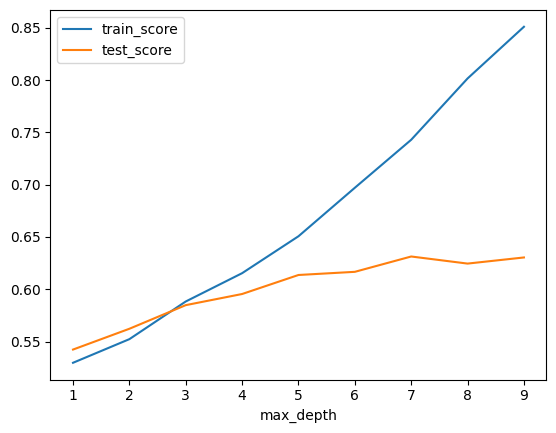

In [55]:
models2_df.plot(x='max_depth')

In [63]:
cc_model = RandomForestClassifier(max_depth=5)
cc_model.fit(X_resampled, y_resampled)
cc_y_pred = cc_model.predict(X_test_orig)
print(balanced_accuracy_score(y_test_orig, cc_y_pred))
print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))

0.6123927725907782
              precision    recall  f1-score   support

cooking wine       0.59      0.78      0.68       263
   promising       0.44      0.75      0.55       159
trivial wine       0.65      0.30      0.41       371

    accuracy                           0.55       793
   macro avg       0.56      0.61      0.55       793
weighted avg       0.59      0.55      0.53       793



In [57]:
# using gridsearch for hyper parameter tuning
# setting up the param grid
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[None, 1,2,3,4,5,6,7,8,9,10,20,30]
}
grid_search=GridSearchCV(estimator=cc_model,param_grid=param_grid, cv=5)
grid_search.fit(X_resampled,y_resampled)
print(f'Best Parameters:{grid_search.best_params_}')

Best Parameters:{'max_depth': 20, 'n_estimators': 200}


In [62]:
# retraining with new data
cc_model = RandomForestClassifier(n_estimators=200,max_depth=20)
cc_model.fit(X_resampled, y_resampled)
cc_y_pred = cc_model.predict(X_test_orig)
print(balanced_accuracy_score(y_test_orig, cc_y_pred))
print(classification_report(y_test_orig, cc_y_pred, target_names=le.classes_))

0.6257480154459852
              precision    recall  f1-score   support

cooking wine       0.64      0.71      0.67       263
   promising       0.52      0.65      0.58       159
trivial wine       0.63      0.51      0.56       371

    accuracy                           0.61       793
   macro avg       0.60      0.63      0.61       793
weighted avg       0.61      0.61      0.60       793

